In [1]:
import tensorflow as tf
import numpy as np
import random

In [2]:
def get_data():
    with open("drug_side_effects.csv",encoding="utf8") as file:
        names = file.readline().split()
        train = np.zeros((200, 5))
        labels = np.zeros((200, 1))
        arr = file.readlines()
        random.shuffle(arr)
        for i, line in enumerate(arr):
            age, sex, bp, ch, na, drug = line.strip().split(',')
            age = int(age)
            sex = 0 if sex == "F" else 1
            bp = -1 if bp == "LOW" else 0 if bp == "NORMAL" else 1
            ch = 0 if ch == "NORMAL" else 1
            na = float(na)
            drug = {"druga": 0, "drugb": 1, "drugc": 2, "drugx": 3, "drugy": 4}[drug.lower()]
            train[i] = age, sex, bp, ch, na
            labels[i] = drug  # Assign the drug label to the labels array
        mean = train.mean(axis=0)
        train -= mean
        std = train.std(axis=0)
        train /= std
        return train, labels

In [3]:

def get_model():
    inputs = tf.keras.Input(shape=(5,))
    x = tf.keras.layers.Dense(32, activation="relu")(inputs)
    x = tf.keras.layers.Dense(32, activation="relu")(x)
    outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model = get_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics="accuracy")
x, y = get_data()
x_train = x[:150]
y_train = y[:150]
x_val = x[150:]
y_val = y[150:]
history = model.fit(x=x_train, y=y_train
                    , validation_data=(x_val, y_val),
                    callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath="Drug.tf", save_best_only=True)], epochs=30)




Epoch 1/30


1/5 [=====>........................] - ETA: 2s - loss: 1.6015 - accuracy: 0.0625INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 2s 280ms/step - loss: 1.5472 - accuracy: 0.2067 - val_loss: 1.4301 - val_accuracy: 0.4800
Epoch 2/30
1/5 [=====>........................] - ETA: 0s - loss: 1.5578 - accuracy: 0.2500INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 150ms/step - loss: 1.4534 - accuracy: 0.4067 - val_loss: 1.3565 - val_accuracy: 0.6200
Epoch 3/30
1/5 [=====>........................] - ETA: 0s - loss: 1.4120 - accuracy: 0.5312INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 163ms/step - loss: 1.3898 - accuracy: 0.5267 - val_loss: 1.2982 - val_accuracy: 0.6400
Epoch 4/30
1/5 [=====>........................] - ETA: 0s - loss: 1.3329 - accuracy: 0.6250INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 211ms/step - loss: 1.3365 - accuracy: 0.5600 - val_loss: 1.2455 - val_accuracy: 0.6600
Epoch 5/30
1/5 [=====>........................] - ETA: 0s - loss: 1.3614 - accuracy: 0.6250INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 155ms/step - loss: 1.2888 - accuracy: 0.5933 - val_loss: 1.1952 - val_accuracy: 0.6600
Epoch 6/30
1/5 [=====>........................] - ETA: 0s - loss: 1.3015 - accuracy: 0.5938INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 210ms/step - loss: 1.2427 - accuracy: 0.6133 - val_loss: 1.1482 - val_accuracy: 0.7200
Epoch 7/30
1/5 [=====>........................] - ETA: 0s - loss: 1.2268 - accuracy: 0.5938INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 165ms/step - loss: 1.1992 - accuracy: 0.6400 - val_loss: 1.1000 - val_accuracy: 0.7200
Epoch 8/30
1/5 [=====>........................] - ETA: 0s - loss: 1.1680 - accuracy: 0.5625INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 212ms/step - loss: 1.1557 - accuracy: 0.6533 - val_loss: 1.0537 - val_accuracy: 0.7400
Epoch 9/30
1/5 [=====>........................] - ETA: 0s - loss: 1.1230 - accuracy: 0.7188INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 157ms/step - loss: 1.1151 - accuracy: 0.6533 - val_loss: 1.0103 - val_accuracy: 0.7600
Epoch 10/30
1/5 [=====>........................] - ETA: 0s - loss: 1.0222 - accuracy: 0.7500INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 214ms/step - loss: 1.0763 - accuracy: 0.6600 - val_loss: 0.9721 - val_accuracy: 0.7800
Epoch 11/30
1/5 [=====>........................] - ETA: 0s - loss: 1.0059 - accuracy: 0.7500INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 182ms/step - loss: 1.0368 - accuracy: 0.6933 - val_loss: 0.9335 - val_accuracy: 0.7800
Epoch 12/30
1/5 [=====>........................] - ETA: 0s - loss: 1.0644 - accuracy: 0.6250INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 179ms/step - loss: 1.0003 - accuracy: 0.7000 - val_loss: 0.8948 - val_accuracy: 0.8000
Epoch 13/30
1/5 [=====>........................] - ETA: 0s - loss: 1.1057 - accuracy: 0.6875INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 186ms/step - loss: 0.9628 - accuracy: 0.7133 - val_loss: 0.8566 - val_accuracy: 0.8200
Epoch 14/30
1/5 [=====>........................] - ETA: 0s - loss: 0.9514 - accuracy: 0.7188INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 154ms/step - loss: 0.9270 - accuracy: 0.7333 - val_loss: 0.8215 - val_accuracy: 0.8200
Epoch 15/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8737 - accuracy: 0.6875INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 171ms/step - loss: 0.8935 - accuracy: 0.7333 - val_loss: 0.7894 - val_accuracy: 0.8400
Epoch 16/30
1/5 [=====>........................] - ETA: 0s - loss: 0.9288 - accuracy: 0.7188INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 153ms/step - loss: 0.8592 - accuracy: 0.7400 - val_loss: 0.7561 - val_accuracy: 0.8400
Epoch 17/30
1/5 [=====>........................] - ETA: 0s - loss: 0.9168 - accuracy: 0.7188INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 211ms/step - loss: 0.8264 - accuracy: 0.7600 - val_loss: 0.7260 - val_accuracy: 0.8400
Epoch 18/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7331 - accuracy: 0.8125INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 159ms/step - loss: 0.7930 - accuracy: 0.7733 - val_loss: 0.6972 - val_accuracy: 0.8400
Epoch 19/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8876 - accuracy: 0.7500INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 168ms/step - loss: 0.7632 - accuracy: 0.7800 - val_loss: 0.6700 - val_accuracy: 0.8400
Epoch 20/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6917 - accuracy: 0.8438INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 232ms/step - loss: 0.7328 - accuracy: 0.7933 - val_loss: 0.6462 - val_accuracy: 0.8400
Epoch 21/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8157 - accuracy: 0.7500INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 175ms/step - loss: 0.7050 - accuracy: 0.7867 - val_loss: 0.6217 - val_accuracy: 0.8600
Epoch 22/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7425 - accuracy: 0.7500INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 213ms/step - loss: 0.6750 - accuracy: 0.8000 - val_loss: 0.5961 - val_accuracy: 0.8800
Epoch 23/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6238 - accuracy: 0.7812INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 170ms/step - loss: 0.6483 - accuracy: 0.7933 - val_loss: 0.5737 - val_accuracy: 0.8800
Epoch 24/30
1/5 [=====>........................] - ETA: 0s - loss: 0.5838 - accuracy: 0.9688INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 223ms/step - loss: 0.6227 - accuracy: 0.8267 - val_loss: 0.5522 - val_accuracy: 0.8800
Epoch 25/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.8125INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 159ms/step - loss: 0.5957 - accuracy: 0.8333 - val_loss: 0.5317 - val_accuracy: 0.9000
Epoch 26/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.8438INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 204ms/step - loss: 0.5703 - accuracy: 0.8333 - val_loss: 0.5108 - val_accuracy: 0.9000
Epoch 27/30
1/5 [=====>........................] - ETA: 0s - loss: 0.4875 - accuracy: 0.8438INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 170ms/step - loss: 0.5445 - accuracy: 0.8400 - val_loss: 0.4889 - val_accuracy: 0.9000
Epoch 28/30
1/5 [=====>........................] - ETA: 0s - loss: 0.5667 - accuracy: 0.9062INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 180ms/step - loss: 0.5214 - accuracy: 0.8600 - val_loss: 0.4727 - val_accuracy: 0.9000
Epoch 29/30
1/5 [=====>........................] - ETA: 0s - loss: 0.5245 - accuracy: 0.8125INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 209ms/step - loss: 0.4976 - accuracy: 0.8600 - val_loss: 0.4543 - val_accuracy: 0.9000
Epoch 30/30
1/5 [=====>........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.8125INFO:tensorflow:Assets written to: Drug.tf\assets


INFO:tensorflow:Assets written to: Drug.tf\assets


5/5 [==============================] - 1s 163ms/step - loss: 0.4741 - accuracy: 0.8800 - val_loss: 0.4364 - val_accuracy: 0.9200


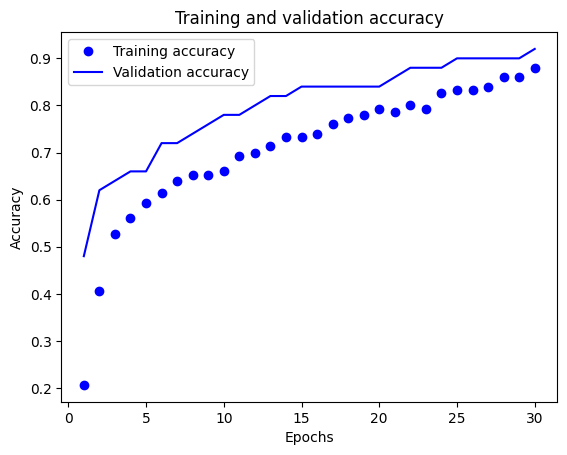

In [5]:
import matplotlib.pyplot as plt

# Accessing accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting accuracy
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
model.save("cnn.h5")

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
final_accuracy = history.history['accuracy'][-1]
print("Final Training Accuracy:", final_accuracy)

Final Training Accuracy: 0.8799999952316284
